<a href="https://colab.research.google.com/github/anhkhoa039/CS112.L11.KHTN/blob/master/week5/Khoa_So.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nhóm:    N010**
# Thành viên:
### *Nguyễn Anh Khoa - 18520923*
### *Võ Quốc An - 18520440*
### *Trần Thị Phương Thảo - 18521422*

# **KHÓA SỐ (0.15s, 100MB)**

Để tăng độ an toàn chống hiện tượng cướp ngân hàng ngày càng phổ biến người ta dùng khóa số với mã mở khóa đơn giản nhưng rất hiệu quả. Trên cửa ra vào hiển thị một xâu khá dài các ký tự số. Các chữ số có thể di chuyển đổi chổ cho nhau hoặc bị xóa. Muốn mở khóa người ta phải di chuyển các chữ số và trong trường hợp cần thiết – xóa vài chữ số để nhận được xâu lớn nhất thỏa mãn điều kiện đã cài đặt. Điều kiện này được thay đổi thường xuyên. Hôm nay điều kiện đó là “Số nhận được phải chia hết cho 3”. Số nhận được có thể bắt đầu bằng các chữ số 0. Xâu “000” sẽ lớn hơn xâu “00”.

Hãy xác định khóa mở cửa.

***Dữ liệu:*** Vào từ thiết bị nhập chuẩn gồm một xâu ký tự số có độ dài lớn hơn 2 và không vượt quá 105.

***Kết quả:*** Đưa ra thiết bị xuất chuẩn xâu khóa mở cửa.

***Ví dụ:***

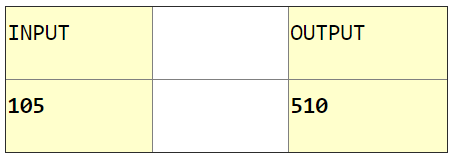

##**1. Abstraction:** 
Tìm dãy con chia hết cho 3 lớn nhất 

##**2-3. Decomposition & Pattern Recognition:**  
### ***Decomposition:***
Có thể chia công việc của bài toán thành 2 phần là: tìm dãy con chia hết cho 3 + tìm dãy con lớn nhất
### ***Pattern Recognition:***

## **4. Algorithm designed:**
Tìm dãy con chia hết cho 3 có số phần tử lớn nhất sau đó sắp sếp dãy số đã tìm được theo thứ tự từ lớn đến bé (giảm dần).
####***Ví dụ:*** 

***Input:*** 1972416

Dãy con chia hết cho 3 có số phần tử lớn nhất: 197416

Sắp xếp giảm dần: 976411

***Input:*** 27516

Dãy con chia hết cho 3 có số phần tử lớn nhất: 27516

Sắp xếp giảm dần: 76521

***Input:*** 862852

Dãy con chia hết cho 3 có số phần tử lớn nhất: 86281

Sắp xếp giảm dần: 88621

**a dãy vào, n = len(a)**

**sum = tổng tất cả các chữ số trong a, i in range(0, n)**

Dựa vào ví dụ trên ta thấy: 

*   Nếu sum chia hết cho 3 thì chỉ cần sắp sếp lại dãy ta thu được hết quả.
*   Nếu sum chia 3 dư x, ta loại bỏ chữ số ai, sao cho ai bé nhất trong các chữ sỗ thuộc dãy vào mà thảo mãn chia 3 dư x.

Nhưng nếu sum % 3 = x, những trong dãy a không có chữ số ai nào thỏa mãn ai %3 = x thì chũng ta cần loại bỏ chữ số nào?

####***Ví dụ:*** 

***Input:*** 32026

***Output:*** 730

***Input:*** 63164

***Output:*** 663

Trong ví dụ 1: 32026 % 3 = 1, Output đã bỏ đi 2 số 2

Trong ví dụ 2: 63164 % 3 = 2, Output đã bỏ đi 1 và 4

Ta nhận thấy ***(2 + 2) = 4 % 3 = 1, (1 + 4) = 5 % 3 = 2***. Tổng 2 chữ sổ chia 3 dư 1 sẽ là 1 số chia 3 dư 2, và Tổng 2 chữ sổ chia 3 dư 2 sẽ là 1 số chia 3 dư 1.

Vì a % 3 dư chỉ có 2 trường hợp là dư 2 hoặc 1. a % 3 = x thì:

*   Tồn tại chữ số ai trong a, sao cho ai % 3 = x.
*   Hoặc tồn tại 2 chữ số ai, aj trong a, sao cho ai%3=(x*2)%3 và aj%3=(x*2)%3.

Ở trường hợp 2 chúng ta sẽ loại tìm và loại bỏ ai, aj khỏi a để thu được dãy chia hết cho 3.






In [1]:
s = input()
a = list(s)
int_s = int(s)
a.sort()

# Nếu dãy chia hết cho 3 thì sx dãy giảm gần, in dãy -> thoát
if int_s % 3 == 0:
    a.reverse()
    print(''.join(a))
    exit()

x = int(int_s % 3)

# Hàm trả về vị trí i trong a sao cho a[i] % 3 = x, nếu không trả về -1
def ind1(a, x):
    ind = -1
    if str(x) in a:
        ind = a.index(str(x))
    elif str(x + 3) in a:
        ind = a.index(str(x+3))
    elif str(x + 6) in a:
        ind = a.index(str(x+6))
    return ind

# Hàm trả về vị trí i, j trong a sao cho a[i] % 3 = x, a[j] % 3 = x, nếu không trả về -1, -1
def ind2(a, x):
    i1 = ind1(a, x)
    i2 = ind1(a[i1+1:], x) + i1 + 1
    return i1, i2

# Tìm và xóa vị trí không thỏa mãn điều kiện, sắp xếp lại dãy giảm dần, in dãy
ind = ind1(a, x)
if ind == -1:
    i1, i2 = ind2(a, (x*2)%3)
    if i1 != -1 and i2 != -1:
        a.remove(a[i1])
        a.remove(a[i2-1])

        a.reverse()

        if len(a) == 1:
            print(str(a[0]))
            exit()
        else:
            print(''.join(a))
            exit()
else:
    a.remove(a[ind])
    a.reverse()
    if a != []:
        print(''.join(a))
        exit()

63164
663
